https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 5 - Caracterizarea Filtrului trece Jos

#### 5.1.1 Montajul experimental:
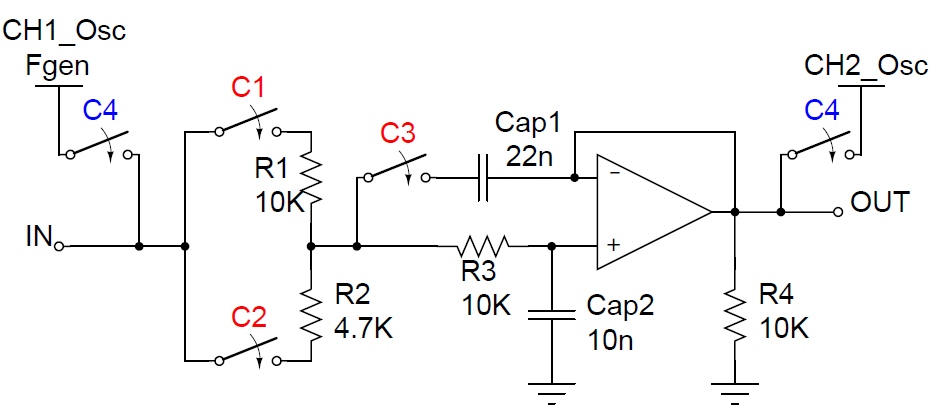

#### 5.1.2 Procedura de masurare:
Montajul experimental se bazează pe un filtru trece jos. Acesta este configurabil din punct de veder al ordinului (1 sau 2) și al frecvenței de tăiere (prin selectare R1 sau R2).

Prin intermediul conectorului C4 intrarea filtrului este legata la canalul 1 al osciloscopului si generatorul de semnal (CH1_osc, Fgen) iar iesirea acestuia, la canalul 2 al osciloscopului. 
C1 si C2 configureaza frecventa de taiere a filtrului, iar C3, ordinal acestuia. Circuitul poate fi configurat pentru 3 frecvente de taiere pentru fiecare ordin. 

Folosind o buclă de tip „for” se va varia frecventa unui semnal sinusoidal si se va monitoriza cu osciloscopul amplitudinea semnalului de la iesirea respectiv intrarea amplificatorului. Raportul celor doua amplitudini reprezinta castigul amplificatorului. Se va trasa caracteristica castig vs. frecventa a FTJ.


#### 5.2 Codul sursa:
5.2.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [2]:
# dmm_handle = connect!("ASRL1::INSTR")
# psu_handle = connect!("ASRL5::INSTR")
fgen_handle = connect!("ASRL5::INSTR")
scope_handle = connect!("USB0::0x0699::0x0364::C057729::INSTR")

# dmm = TIVM.GDM8246(dmm_handle);
# psu = TIVM.PST3201(psu_handle);
fgen = TIVM.GFG3015(fgen_handle);
scope = TIVM.TDS2002B(scope_handle);

In [6]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
@async start_gui(fgen_handle = fgen_handle, scope_handle = scope_handle);

5.2.2 Connfigurarea instrumentelor

In [4]:
# Generatorul de semnal
set_wfm(fgen, "C1", "sinusoid")
sleep(1)
set_freq(fgen, "C1", 1000)
sleep(1)
set_amplit_unit(fgen, "C1", "Vpp")
sleep(1)
set_amplit(fgen, "C1", 1)
sleep(1)
set_offs(fgen, "C1", 0)
sleep(1)
set_duty(fgen, "C1", 50)
sleep(1)

In [5]:
# Osciloscopul
#autoset is hidden :P
#ch coupling - WIP
set_ch_position(scope, "CH1", 0)
set_ch_position(scope, "CH2", 0)
#ch probe - do we need this?
set_vertical_scale(scope, "CH1", 0.5)
set_vertical_scale(scope, "CH2", 0.5)
set_horizontal_scale(scope, 0.001)
set_trig_ch(scope, "CH1")
set_trig_mode(scope, "NORMAL") # "NORMAL"/"AUTO"
set_trig_level(scope, 0.001)
# do we need trigger coupling or slope?
# Masuratori - se pot configura maxim 5 pt ambele canale impreuna
set_meas(scope, "MEAS1", "CH1", "FREQuency")
set_meas(scope, "MEAS2", "CH1", "PK2pk")
set_meas(scope, "MEAS3", "CH2", "FREQuency")
set_meas(scope, "MEAS4", "CH2", "PK2pk")
set_meas(scope, "MEAS5", "CH1", "PERIod")

5.2.3 Definirea stimulilor si a variabilelor auxiliare

In [7]:
freq = 100:200:3500# create a vector of frequencies

100:200:3500

5.2.4 Bucla de masurare

In [8]:
in_freq = []
in_amplit_meas = []
out_amplit_meas = []
gain = []
crt_meas_amplit_out = 0
crt_meas_amplit_in = 0
fcut=0
for crt_freq in freq
    set_freq(fgen, "C1", crt_freq)
    tbase = 1/crt_freq
    set_horizontal_scale(scope, tbase)                                
    sleep(2) # fgen and osc are slow to respond

    crt_meas_amplit_in = get_meas_data(scope, "MEAS2")
    crt_meas_amplit_out = get_meas_data(scope, "MEAS4")

    crt_gain = crt_meas_amplit_out/crt_meas_amplit_in
    
    # store crt stimuli value
    push!(in_freq, crt_freq)

    # store crt measurement value
    push!(in_amplit_meas, crt_meas_amplit_in)
    push!(out_amplit_meas, crt_meas_amplit_out)
    push!(gain, crt_gain)

    # print info to console
    @info "crt_freq=$crt_freq, crt_meas_amplit_in=$crt_meas_amplit_in, crt_meas_amplit_out=$crt_meas_amplit_out,crt_gain=$crt_gain"
  end

┌ Info: crt_freq=100, crt_meas_amplit_in=2.1199998856, crt_meas_amplit_out=2.1199998856,crt_gain=1.0
└ @ Main In[8]:28
┌ Info: crt_freq=300, crt_meas_amplit_in=2.0999999046, crt_meas_amplit_out=2.0799999237,crt_gain=0.9904761991387758
└ @ Main In[8]:28
┌ Info: crt_freq=500, crt_meas_amplit_in=2.0799999237, crt_meas_amplit_out=2.0199999809,crt_gain=0.9711538725956926
└ @ Main In[8]:28
┌ Info: crt_freq=700, crt_meas_amplit_in=2.0799999237, crt_meas_amplit_out=1.939999938,crt_gain=0.9326923120982804
└ @ Main In[8]:28
┌ Info: crt_freq=900, crt_meas_amplit_in=2.0799999237, crt_meas_amplit_out=1.8799999952,crt_gain=0.903846184693973
└ @ Main In[8]:28
┌ Info: crt_freq=1100, crt_meas_amplit_in=2.0399999619, crt_meas_amplit_out=1.7599999905,crt_gain=0.8627451094953865
└ @ Main In[8]:28
┌ Info: crt_freq=1300, crt_meas_amplit_in=2.0399999619, crt_meas_amplit_out=1.6799999475,crt_gain=0.8235294014100344
└ @ Main In[8]:28
┌ Info: crt_freq=1500, crt_meas_amplit_in=2.0399999619, crt_meas_amplit_out=1

5.2.5 Oprirea instrumentelor

In [9]:
set_amplit(fgen, "C1", 0.02) 

5.2.6 Generarea caracteristicilor, dupa incheierea masuratorilor

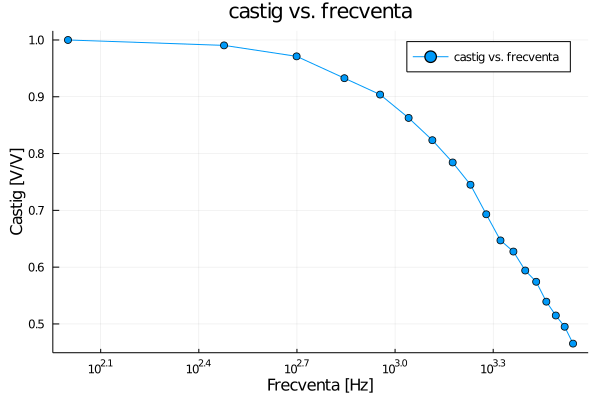

In [10]:
# castig vs frecventa
h1=plot(in_freq, gain; xaxis=:log, markershape=:circle, label="castig vs. frecventa");
title!("castig vs. frecventa");
xlabel!("Frecventa [Hz]");
ylabel!("Castig [V/V]");
display(h1)

5.2.7 Salvarea datelor in fisierul .csv

In [11]:
df = DataFrame(
    "Frecventa [Hz]" => in_freq,
    "Amplitudinea la intrare [V]" => in_amplit_meas,
    "Amplitudinea la iesire [V]" => out_amplit_meas,
    "Castig [V/V]" => gain,
    )
CSV.write("0005_FTJ.csv", df)

"0005_FTJ.csv"

5.2.8 Deconectarea instrumentelor

In [12]:
disconnect!(fgen_handle)
disconnect!(scope_handle)

0

#### 5.3 Desfasurarea lucrarii:

In [ ]:
1. Reduceti perioada de asteptare dintre setarea instrumentelor si masuratoare la 0.5s sleep(2) -> sleep(0.5). Ce observati?
Indicație: Este suficient jumătate de secundă timp de achiziție pentru osciloscop?
2. Măriţi precizia măsurătorilor.
Indicație: Ajustați pasul folosit de funcția for.
3. Afișați caracteristica filtrului în decibeli.
Indicație: crt_gain = 20 .* log10.(crt_meas_amplit_out./crt_meas_amplit_in)
4. Afisati caracteristica filtrului folosind o scara dublu logaritmica.
5. Determinați (în script) frecvența de tăiere.
Indicație: Atentie la ordinul filtrului.
   if crt_gain > -3
        fcut=crt_freq
        @info "taiere taiere"
    else
    end
6. Determinați și afișați panta filtrului (în decibeli). 
Indicație: Panta poate fi aproximată folosind două puncte situate după frecvența de tăiere(unul dintre acestea poate fi chiar frecvenţa de tăiere).
7. Adăugați la fișierul cu datele masurate o coloană pentru atenuarea filtrului în decibeli.
8. Modificați script-ul pentru a măsura două din cele 4 configurații de filtre. Introduceți datele măsurate într-un fișier. 